# Supplement - Visual analysis - Training study 2

Supplement for an experiment that trainined visual inspection skills for single-case graphs to students.

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Loading required package: Matrix

Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Attaching package: 'lmerTest'

The following object is masked from 'package:lme4':

    lmer

The following object is masked from 'package:stats':

    step

Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'

wmisc 0.2.25 (2024-08-09)

# Sample

In [ ]:
# Filter subjects with less than 20% fast responses

sample_table <- dat_items %>% group_by(id_subject, group) %>%
  summarise(n = n()) %>%
  group_by(group) %>%
  summarise(Initial = n())

`summarise()` has grouped output by 'id_subject'. You can override using the
`.groups` argument.

`summarise()` has grouped output by 'id_subject'. You can override using the
`.groups` argument.

`summarise()` has grouped output by 'id_subject'. You can override using the
`.groups` argument.

Participants were excluded from the dataset when they had 20% or more fast responses. A fast response was defined as a response equal or less than 500ms.

After the experiment, we asked the students if they worked through the experiment thoroughly on a four point scale in two questions. We excluded those that responded with “no” or “rather not”.

In [ ]:
nice_table(
  sample_table,
  title = "Number of participants",
  file = TRUE,
  spanner = list(n = 2:4),
  cols_label = list(
    group = "Group condition",
    fast = html("After removal of fast responders")#,
    #compliance = html("After removal of fast responders and <br>non compliant participants")
  )
)

All data where collected at the University of Potsdam at the end of a lecture on inclusive education.

In [ ]:
dat_subjects %>% 
  count(group, uni) %>% 
  pivot_wider(names_from = group, values_from = n) %>%
  mutate(across(1:3, ~replace_na(.x, 0))) %>%
  bind_rows("a" = summarise(., 
    across(1, ~"Total" ),
    across(2:3, ~(sum(.x)))
  )) %>%
  mutate(Total = Training + Control) %>%
  nice_table(
    spanner = list("Group condition" = 2:4), 
    cols_label = list(uni = "University"),
    title = "Place of data collection",
    file = "tab-sample.docx"
  ) 

In [ ]:
nice_frequencies(dat_subjects$age)

# Material

In [ ]:
digits <- 3
dat_item_stats %>% 
  group_by(trend_design, slope_design) %>%
  summarise(
    n_items = n(),
    mean_trend = round(mean(trend_es), digits),
    min_trend = round(min(trend_es), digits),
    max_trend = round(max(trend_es), digits),
    mean_slope = round(mean(slope_es), digits),
    min_slope = round(min(slope_es), digits),
    max_slope = round(max(slope_es), digits)
  ) %>% ungroup() |> relocate(n_items, .after = last_col()) |>
  nice_table(
    title = "Descriptive statistics for the graphs", 
    spanner = list(
      "Design" = c("trend_design", "slope_design"),
      "Trend" = c("mean_trend", "min_trend", "max_trend"),
      "Slope" = c("mean_slope", "min_slope", "max_slope")
    ),
    cols_label = list(
      n_items = "N items",
      mean_slope = "M",
      min_slope = "Min",
      max_slope = "Max",
      mean_trend = "M",
      min_trend = "Min",
      max_trend = "Max",
      trend_design = "Trend", 
      slope_design = "Slope"
    ), 
    file = "tab-desc-items.docx"
  )

# Results

## Descriptives

In [ ]:
dat_items %>%
  filter(question == "effect") %>%
  group_by(group, effect, time) %>%
  summarise(
    mean_true = round(mean(response, na.rm = TRUE), 2)
  ) %>%
  ungroup() %>%
  pivot_wider(names_from = "time", values_from = "mean_true") %>%
    mutate(
    "Difference" = Post - Pre
  ) %>%
  relocate(group, effect) %>%
  nice_table(
    file = "tab-desc-prop-response.docx", 
    title = "Proportion of graphs rated as showing an intervention effect"
  )

`summarise()` has grouped output by 'group', 'effect'. You can override using
the `.groups` argument.

In [ ]:
dat_sample_averages <- dat_items %>%
  filter(question == "certainty") %>%
  group_by(group, effect, time) %>%
  summarise(
    mean_response = mean(response, na.rm = TRUE),
    sd_response = sd(response, na.rm = TRUE)
  ) %>%
  ungroup() %>%
  pivot_wider(names_from = "time", values_from = c("mean_response", "sd_response")) %>%
  mutate(
    "Mean difference" = mean_response_Post - mean_response_Pre,
    "Cohen's d" =  (mean_response_Post - mean_response_Pre) / 
                   sqrt(mean(c(sd_response_Post^2, sd_response_Pre^2))),
    across(where(is.numeric), ~round(.x, 2))
  ) %>%
  rename(
    Condition = group, Effect = effect, 
    "M Post" = mean_response_Post, "M Pre" = mean_response_Pre,
    "SD Post" = sd_response_Post, "SD Pre" = sd_response_Pre,
  ) %>%
  relocate(Condition, Effect)

`summarise()` has grouped output by 'group', 'effect'. You can override using
the `.groups` argument.

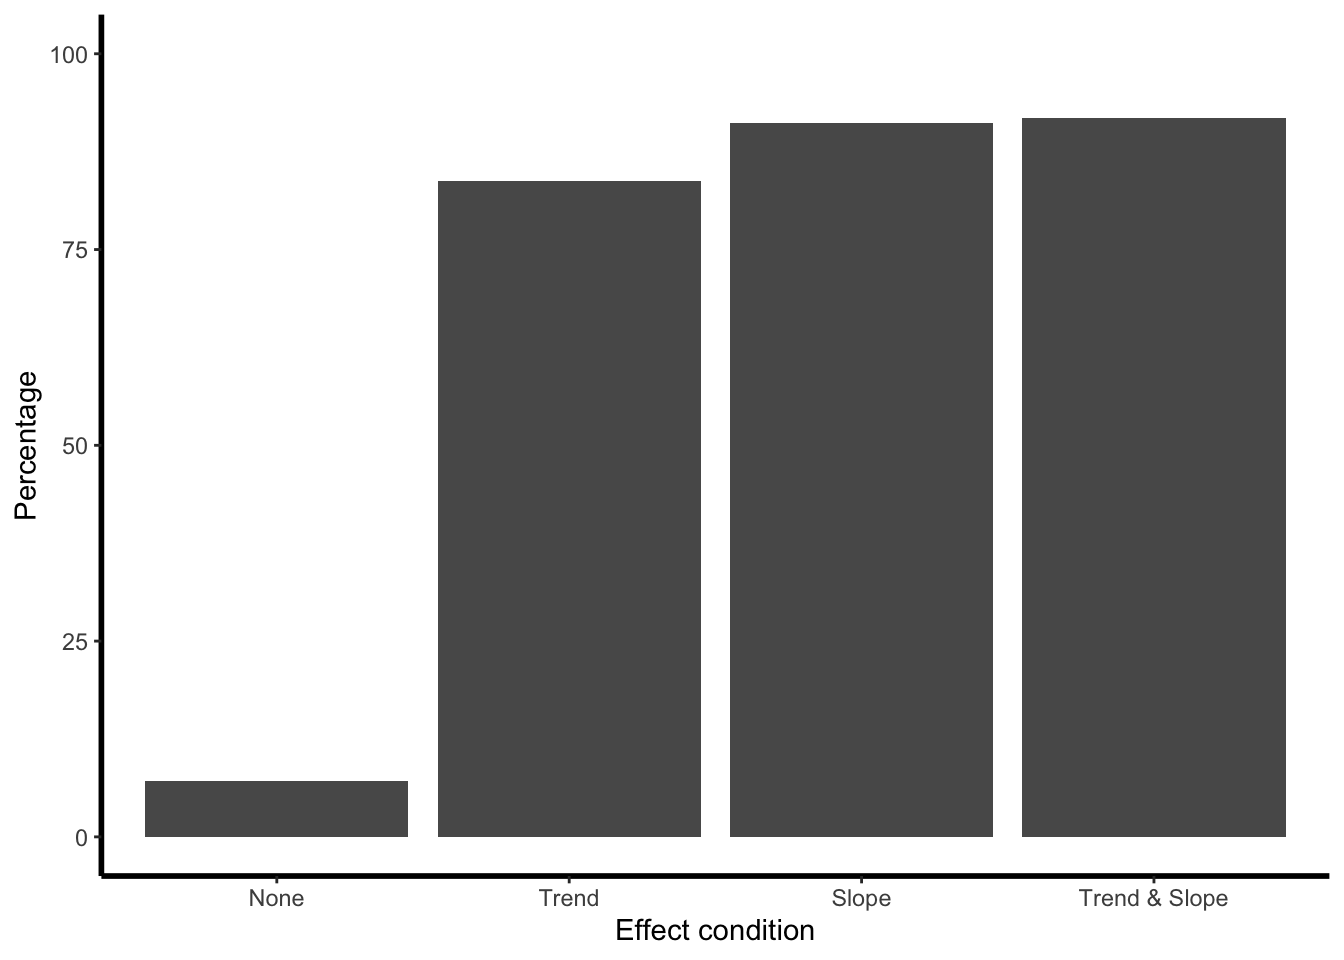

In [ ]:
dat_sample_averages <- dat_items %>%
  filter(question == "effect", time == "Pre") %>%
  group_by(effect) %>%
  summarise(
    Percentage = mean(response, na.rm = TRUE) * 100
  ) %>%
  ungroup()

ggplot(dat_sample_averages, aes(y = Percentage, x = effect)) +
  geom_bar(stat = "identity") +
  ylim(c(0,100)) +
  xlab("Effect condition") +
  theme(
    panel.background = element_rect(fill = "white"),
    legend.key  = element_rect(fill = "white"),
    axis.line.x = element_line(colour = "black", linewidth = 1),
    axis.line.y = element_line(colour = "black", linewidth = 1)
  )

## Models

### Pretest model

In [ ]:
dat <- dat_items %>% 
  filter(question == "effect") %>%
  mutate(response = factor(response, labels = c("No", "Yes"))) %>%
  rename(Condition = group, Effect = effect, Time = time)

model1 <- glmer(
  response ~ Effect + 
             (1|id_subject) + (1|id_subject:Effect), 
  family = binomial,
  nAGQ = 0,
  data = dat %>% filter(Time == "Pre"), 
  na.action = na.omit
)

nice_regression_table(
  model1, 
  labels_models = "Pre-test only", 
  rename_cols = list(Estimate = "OR"),
  or = TRUE, 
  rename_labels = list(EffectTrend = "Trend", EffectSlope = "Slope", "TimePost" = "Post",
                       ConditionTraining = "Training", id_subject = "Subject"), 
  file = "tab-reg-response-pretest.docx"
)

In [ ]:
marginal_means <- emmeans(model1, c("Effect"),
  pbkrtest.limit = 9000,
  lmerTest.limit = 9000
)

means <- summary(marginal_means) |> as.data.frame()
means$probability <- logit2prob(means$emmean)
means$prob.ll <- logit2prob(means$asymp.LCL)
means$prob.ul <- logit2prob(means$asymp.UCL)

table <- means %>% select(Effect, probability) 
 
nice_table(
    table,
    file = "tab-marginal-means-pretest-response.docx",
    title = "Pretest marginal means",
    round = 2
  )

### Pre- and posttest model

In [ ]:
model2 <- glmer( 
  response ~ Time * Condition * Effect + 
             (1|id_subject) + (1|id_subject:Time) + 
             (1|id_subject:Effect), 
  family = binomial,
  nAGQ = 0,
  data = dat, 
  na.action = na.omit
)

nice_regression_table(
  model2, 
  labels_models = "Full model", 
  rename_cols = list(Estimate = "OR"),
  or = TRUE, 
  rename_labels = list(EffectTrend = "Trend", EffectSlope = "Slope", "TimePost" = "Post",
                       ConditionTraining = "Training", id_subject = "Subject"), 
  file = "tab-reg-response-full.docx"
)

In [ ]:
interaction_stat <- function(ref) {
  model <- update(model2, contrasts = list(Effect = contr.treatment(4, base = ref)))
  res <- coef(summary(model))["TimePost:ConditionTraining",, drop=FALSE]
  paste0("*OR* = ", round(exp(res[1,1]), 2), ", *z* = ", round(res[1,3], 2), ", *p* = ", nice_p(res[1,4]))
}

### Interaction of Time by group-condition for each effect-condition

In [ ]:
data.frame(
  'Effect condition' = c("None", "Trend", "Slope", "Trend & Slope"),
  Statistic = c(interaction_stat(1), interaction_stat(2), interaction_stat(3), interaction_stat(4)),
  check.names = FALSE
) |>
  nice_table(
    title = "Contrasts for interactions of time by condition", 
    file = TRUE
  )

### Estimated marginal means

In [ ]:
marginal_means <- emmeans(model2, c("Time", "Effect", "Condition"),
  pbkrtest.limit = 9000,
  lmerTest.limit = 9000
)

means <- summary(marginal_means) |> as.data.frame()
means$probability <- logit2prob(means$emmean)
means$prob.ll <- logit2prob(means$asymp.LCL)
means$prob.ul <- logit2prob(means$asymp.UCL)

table_pre_post <- means %>%
  select(Condition, Effect, Time, probability) %>%
  pivot_wider(names_from = "Time", values_from = "probability") %>%
  mutate(Difference = round(Post-Pre, 2), Pre = round(Pre, 2), Post = round(Post, 2)) 

table_contrast <- marginal_means |> 
  pairs() |> 
  as.data.frame() |> 
    filter(contrast %in% c(
    "Pre None Control - Post None Control",
    "Pre None Training - Post None Training",
    "Pre Trend Control - Post Trend Control",
    "Pre Trend Training - Post Trend Training",
    "Pre Slope Control - Post Slope Control",
    "Pre Slope Training - Post Slope Training",
    "Pre Trend & Slope Control - Post Trend & Slope Control",
    "Pre Trend & Slope Training - Post Trend & Slope Training"
  )) %>% 
  mutate(
    across(where(is.numeric), ~round(.x, 2))
  ) %>%
  rename("z ratio" = z.ratio, p = p.value) %>% 
  select(-1, -estimate, -df)

table_pre_post <- cbind(table_pre_post, table_contrast)
  nice_table(
    table_pre_post,
    file = "tab-marginal-means-response.docx",
    title = "Pre/post post-hoc contrasts of proportions of graphs rated as showing an intervention effect"
  )

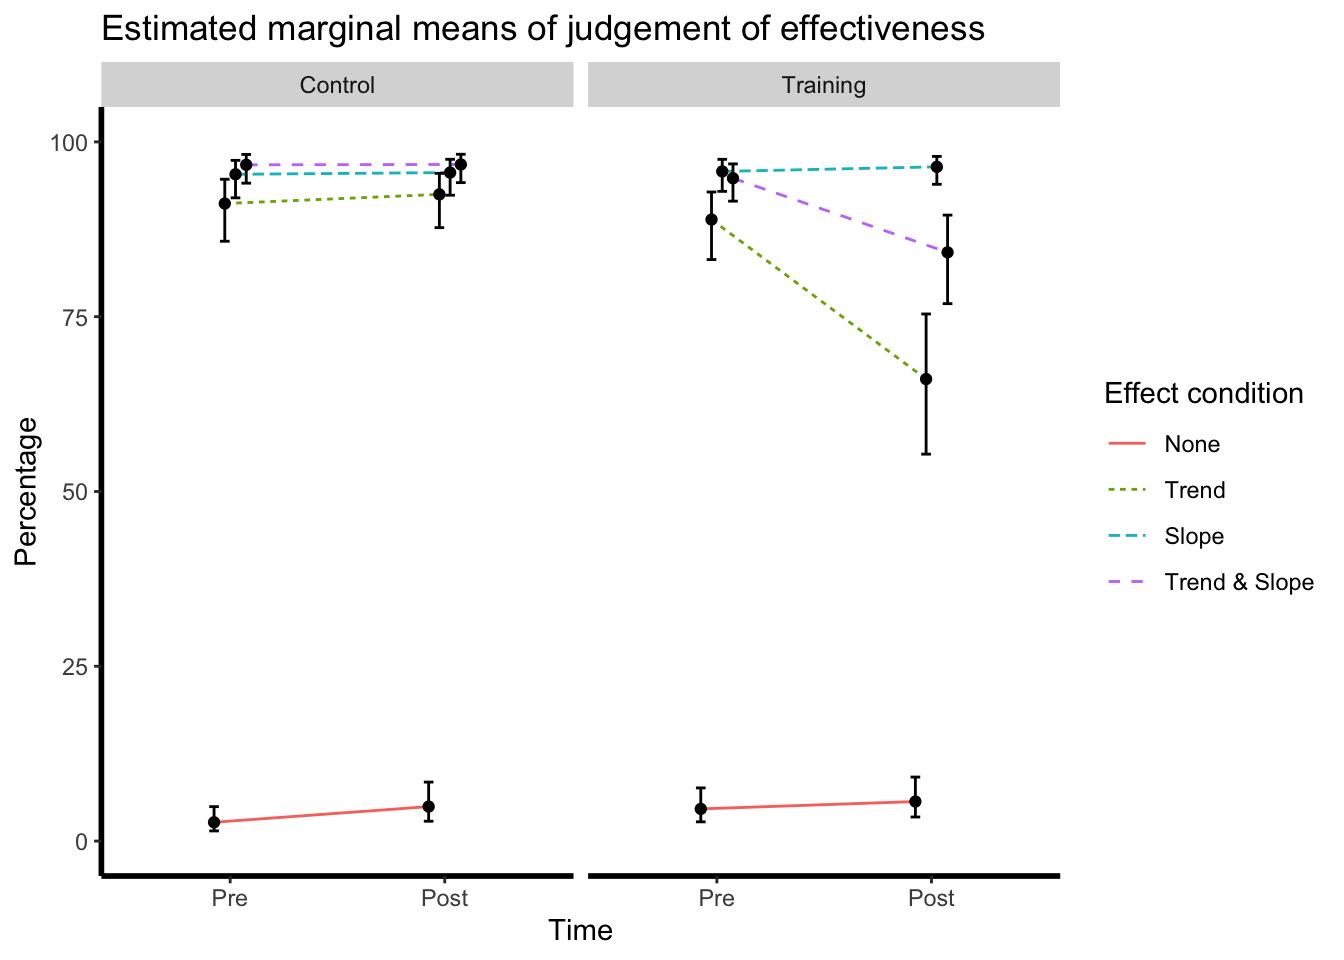

Saving 7 x 5 in image

In [ ]:
means %>% 
  mutate(Percentage = probability * 100) %>%
  ggplot(aes(x = Time, y = Percentage)) +
  geom_line(
    aes(color = Effect, group = Effect, linetype = Effect),
    position = position_dodge(0.2)
  ) + 
  geom_point(
    aes(group = Effect),
    position = position_dodge(0.2)
  ) + 
  geom_errorbar(
    aes(ymin = prob.ll * 100, ymax = prob.ul * 100), 
    width = 0.2,
    position = position_dodge2(0.2)
  ) +  
  facet_grid(cols = vars(Condition)) +
  ylim(c(0,100)) +
  theme(
    panel.background = element_rect(fill = "white"),
    legend.key  = element_rect(fill = "white"),
    axis.line.x = element_line(colour = "black", linewidth = 1),
    axis.line.y = element_line(colour = "black", linewidth = 1)
  ) + 
  xlab("Time") +
  labs(linetype = "Effect condition", colour = "Effect condition") + 
  ggtitle("Estimated marginal means of judgement of effectiveness")

### Confidence

In [ ]:
dat <- dat_items %>% 
  filter(question == "certainty") %>%
  mutate(response_std = scale(response)) %>%
  rename(Condition = group, Effect = effect, Time = time)

model_full <- lmer(
  response_std ~ Time * Condition * Effect + 
    (1|id_subject) + (1|id_subject:Time) + (1|id_subject:Effect), 
  data = dat, 
  na.action = na.omit
)

model_no_effect_condition <- lmer(
  response_std ~ Time * Condition + 
    (1|id_subject) + (1|id_subject:Time), 
  data = dat, 
  na.action = na.omit
)


nice_regression_table(
  model_full,
  labels_models = c("Full model with effect-conditions"),
  file = "tab-reg-confidence-full.docx",
  rename_cols = list(Estimate = "Beta"),
  rename_labels = list(EffectTrend = "Trend", EffectSlope = "Slope", "TimePost" = "Post",
                       ConditionTraining = "Training", id_subject = "Subject")
)

In [ ]:
interaction_stat <- function(ref) {
  model <- update(model_full, contrasts = list(Effect = contr.treatment(4, base = ref)))
  res <- coef(summary(model))[7,, drop=FALSE]
  paste0("ß = ", round(res[1,1],2), ", *t*( ", round(res[1,3],2), ") = ", round(res[1,4], 2), ", *p* = ", nice_p(res[1,5])) 
}

### Interaction of Time by group-condition for each effect-condition

In [ ]:
data.frame(
  Effect = c("None", "Trend", "Slope", "Trend & Slope"),
  Statistic = c(interaction_stat(1), interaction_stat(2), interaction_stat(3), interaction_stat(4))
) |>
  nice_table(title = "Contrasts for interactions of time by condition for confidence of judgement ratings", file = TRUE)

### Estimated marginal means confidenc of judgement

#### standardized

In [ ]:
marginal_means <- emmeans(
  model_full,
  c("Time", "Effect", "Condition"), 
  pbkrtest.limit = 11000,
  lmerTest.limit = 11000
)

table_pre_post <- marginal_means |> 
  summary()  |> 
  as.data.frame()  |> 
  mutate(across(where(is.numeric), ~round(.x, 2)))  |> 
  select(Condition, Effect, Time, emmean) %>%
  pivot_wider(names_from = "Time", values_from = "emmean")  |> 
  mutate(Difference = Post-Pre)

table_contrast <- marginal_means |> 
  pairs() |> 
  as.data.frame() |> 
    filter(contrast %in% c(
    "Pre None Control - Post None Control",
    "Pre None Training - Post None Training",
    "Pre Trend Control - Post Trend Control",
    "Pre Trend Training - Post Trend Training",
    "Pre Slope Control - Post Slope Control",
    "Pre Slope Training - Post Slope Training",
    "Pre Trend & Slope Control - Post Trend & Slope Control",
    "Pre Trend & Slope Training - Post Trend & Slope Training"
  )) %>% 
  mutate(
    across(where(is.numeric), ~round(.x, 2))
  ) %>%
  rename("t ratio" = t.ratio, p = p.value) %>% 
  select(-1, -estimate, -df)

table_pre_post <- cbind(table_pre_post, table_contrast)

nice_table(
  table_pre_post,
  file = "tab-posthoc-confidence.docx",
  title = "Pre/post post-hoc contrasts of confidence of judgement raitings (Z-values)"
)

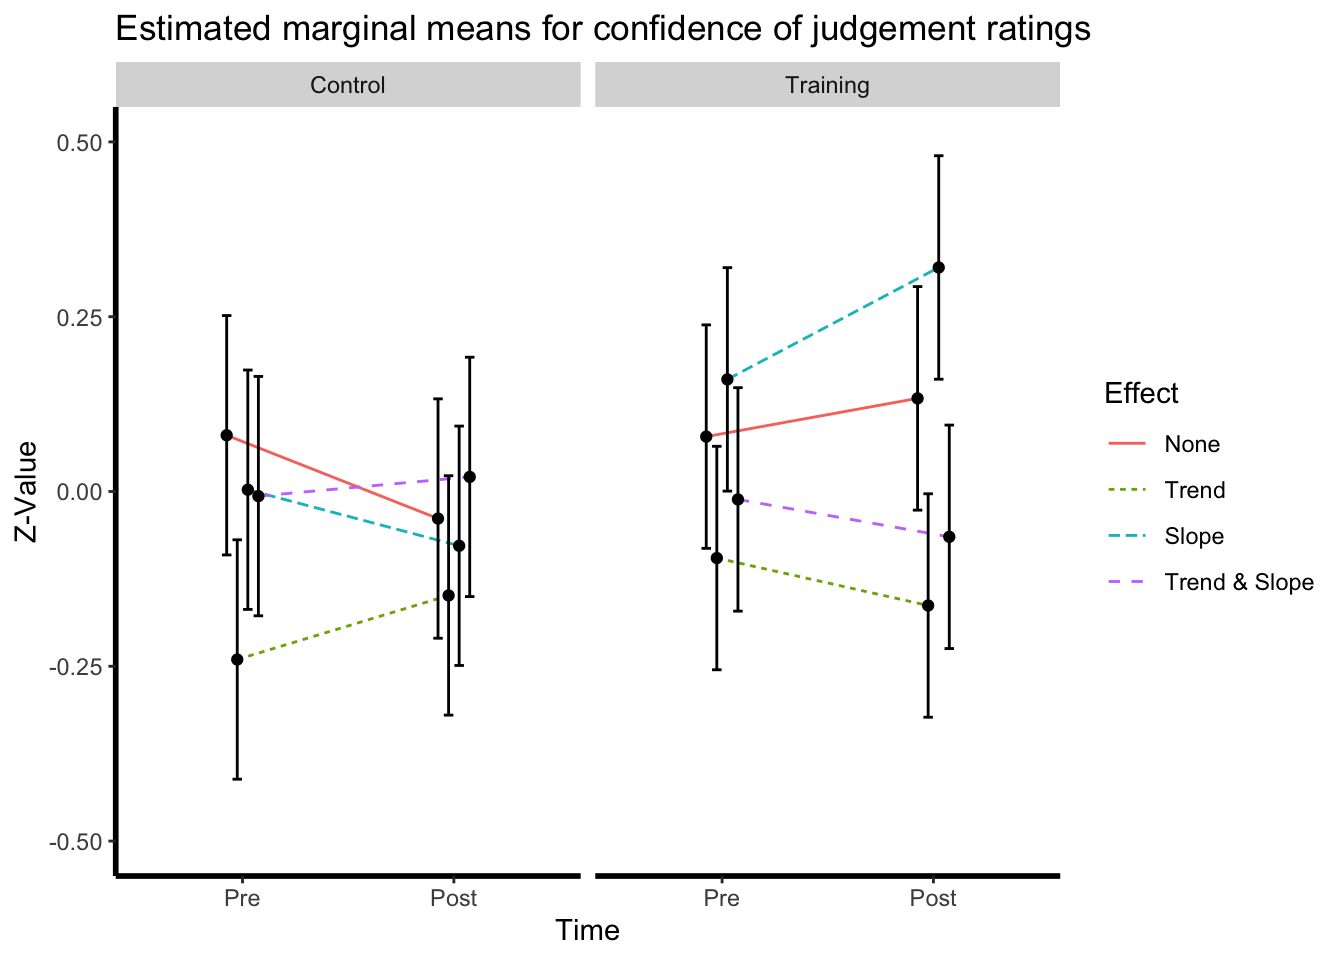

Saving 7 x 5 in image

In [ ]:
means <- as.data.frame(marginal_means)

means %>%
ggplot(aes(x = Time, y = emmean)) +
  geom_line(
    aes(color = Effect, group = Effect, linetype = Effect),
    position = position_dodge(width = 0.2)
  ) + 
  geom_point(
    aes(group = Effect),
    position = position_dodge(width = 0.2)
  ) + 
  geom_errorbar(
    aes(ymin = lower.CL, ymax = upper.CL), 
    width = 0.2,
    position = position_dodge2(0.2)
  ) +  
  facet_grid(cols = vars(Condition)) +
  ylim(c(-0.5,0.5)) +
  theme(
    panel.background = element_rect(fill = "white"),
    legend.key  = element_rect(fill = "white"),
    axis.line.x = element_line(colour = "black", linewidth = 1),
    axis.line.y = element_line(colour = "black", linewidth = 1)
  ) + 
  xlab("Time") +
  ylab("Z-Value") +
  ggtitle("Estimated marginal means for confidence of judgement ratings")

#### Non standardized

In [ ]:
model_full <- lmer(
  response ~ Time * Condition * Effect + 
    (1|id_subject) + (1|id_subject:Time) + (1|id_subject:Effect), 
  data = dat, 
  na.action = na.omit
)

In [ ]:
marginal_means <- emmeans(
  model_full,
  c("Time", "Effect", "Condition"), 
  pbkrtest.limit = 11000,
  lmerTest.limit = 11000
)

table_pre_post <- marginal_means |> 
  summary()  |> 
  as.data.frame()  |> 
  mutate(across(where(is.numeric), ~round(.x, 2)))  |> 
  select(Condition, Effect, Time, emmean) %>%
  pivot_wider(names_from = "Time", values_from = "emmean")  |> 
  mutate(Difference = Post-Pre)

table_contrast <- marginal_means |> 
  pairs() |> 
  as.data.frame() |> 
    filter(contrast %in% c(
    "Pre None Control - Post None Control",
    "Pre None Training - Post None Training",
    "Pre Trend Control - Post Trend Control",
    "Pre Trend Training - Post Trend Training",
    "Pre Slope Control - Post Slope Control",
    "Pre Slope Training - Post Slope Training",
    "Pre Trend & Slope Control - Post Trend & Slope Control",
    "Pre Trend & Slope Training - Post Trend & Slope Training"
  )) %>% 
  mutate(
    across(where(is.numeric), ~round(.x, 2))
  ) %>%
  rename("t ratio" = t.ratio, p = p.value) %>% 
  select(-1, -estimate, -df)

table_pre_post <- cbind(table_pre_post, table_contrast)

nice_table(
  table_pre_post,
  file = "tab-posthoc-confidence-not-std.docx",
  title = "Pre/post post-hoc contrasts of confidence of judgement raitings (0-3)"
)

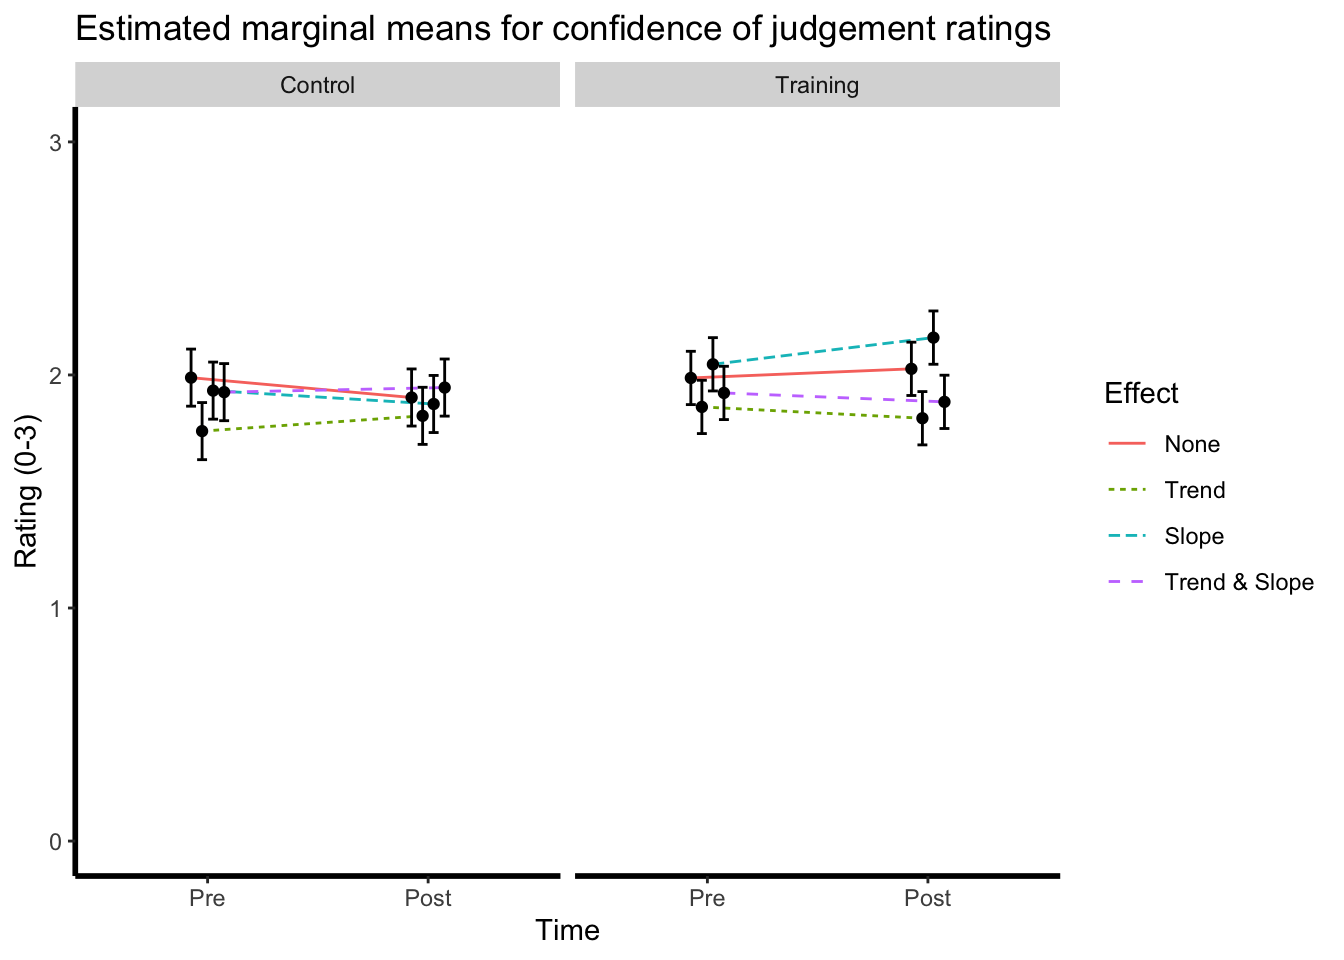

Saving 7 x 5 in image

In [ ]:
means <- as.data.frame(marginal_means)

means %>%
ggplot(aes(x = Time, y = emmean)) +
  geom_line(
    aes(color = Effect, group = Effect, linetype = Effect),
    position = position_dodge(width = 0.2)
  ) + 
  geom_point(
    aes(group = Effect),
    position = position_dodge(width = 0.2)
  ) + 
  geom_errorbar(
    aes(ymin = lower.CL, ymax = upper.CL), 
    width = 0.2,
    position = position_dodge2(0.2)
  ) +  
  facet_grid(cols = vars(Condition)) +
  ylim(c(0, 3)) +
  theme(
    panel.background = element_rect(fill = "white"),
    legend.key  = element_rect(fill = "white"),
    axis.line.x = element_line(colour = "black", linewidth = 1),
    axis.line.y = element_line(colour = "black", linewidth = 1)
  ) + 
  xlab("Time") +
  ylab("Rating (0-3)") +
  ggtitle("Estimated marginal means for confidence of judgement ratings")